# College of Computing and Informatics, Drexel University
# INFO 212: Data Science Programming I
# Due: Wednesday, Dec. 11, 2024
---

## Final Project Report

## Project Title: Analyzing Flight Delays- A Data-Driven Study of the Aviation Industry

## Student(s): Mustafa Bookwala
 
## Date: December 11, 2024
---

# Requirements:
1. **Formatting and Structure**:
The report must follow a clear, logical structure (use headings, subheadings, markdown cells, and code cells for organization).
2. **Analysis Code and Results**:
Include all analysis code in code cells. Ensure the code is clean, readable, and uses proper commenting where necessary.
3. **Explanations**: Use markdown cells to clearly explain each step of the analysis process. Provide context for the code being executed. Interpret the results (e.g., what do the visualizations show? What insights can be drawn?).
4. **Reproducibility**:
Provide all code and commands necessary for reproducing your analysis. Ensure all data imports, transformations, and analyses run correctly in sequence.

# Marking Scheme:
- **Organization and Formatting (10 points)**: Is the notebook well-structured and visually clean?
- **Reproducibility (10 points)**: Can the entire analysis be reproduced seamlessly?
- **Code Quality (20 points)**: Is the code clear, concise, and well-documented?
- **Explanations and Insights (20 points)**: Are steps and results well-explained and insightful?
- **Data Visualization and Presentation (20 points)**: Are plots and tables effective and well-labeled?
- **Technical Content (20 points)**:
 * Is the problem well defined and described thoroughly?
 * Is the size and complexity of the data set used in this project comparable to that of the example data sets used in the lectures and assignments?
 * Did the analysis use plotting methods for visualization? Does the visualization convey meaningful messages?
 * Did the analysis use wrangling, cleaning, and preparation methods? Does the work on wrangling, cleaning, and preparation demonstrate the student's knowlegde about these topics covered in this course?
 * Did the analysis conduct aggretation and create descriptive statistics? Does the work on aggregation and descriptive statistics demonstrate the student's knowlegde about these topics covered in this course?

# YOUR REPORT GOES HERE

In [73]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Introduction
---
- Introduce the project and describe the objectives.
- State the main questions or problems you aim to address with your analysis.
- Provide a summary of entire project including the data, analytics methods, and the key findings.

# ANSWER 1 -

The aviation industry relies on timely and reliable flight operations. Delays can have significant financial and customer satisfaction implications. This project report aims to analyze flight delays using a large dataset of flight records. Below are the questions I will be answering -

- **Key Questions**:
  - Which airlines experience the longest delays on average?
  - How do delays vary by origin and destination airports?
  - What are the common causes of flight delays?

**Data and Methods**:
- **Data**: The dataset consists of flight information (e.g., flight times, delays, origin, destination).
- **Methods**: We will use Python (pandas, matplotlib, seaborn) for data cleaning, aggregation, and visualization.
- **Key Findings Summary**: We anticipate identifying patterns in delays (by airline, airport, time of day, etc.) and offering insights that can help improve on-time performance and customer satisfaction.


# 2. Data Description
---
- Data Source: Describe the origin of your dataset. Provide a link if applicable.
- Data Loading: Present the code and methods for acquiring the data. Load the data into appropriate format for analysis.
- Dataset Analysis: Analyze the key attributes and features of your dataset (e.g., number of rows, columns, types of data).
- Data Cleaning: Clean and preprocess the data, including handling missing values or duplicates.

# ANSWER 2 -

This section describes the dataset and its attributes, how it was loaded, cleaned, and prepared for analysis.

In [74]:
df = pd.read_csv("/Users/mustafabookwala/Desktop/Drexel/Pre-Junior/Fall 2024/INFO 212/Final Project/archive/flights.csv") # Loading the csv as a dataframe
df.head() # Displaying its first five elements

/var/folders/mw/4snkpx0970n_6rz3jtvq4yxr0000gn/T/ipykernel_27860/1031735547.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/mustafabookwala/Desktop/Drexel/Pre-Junior/Fall 2024/INFO 212/Final Project/archive/flights.csv") # Loading the csv as a dataframe


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Data Source**: The data is derived from the 2015 US Flight data.
**Link**: https://www.kaggle.com/code/farzadnekouei/flight-data-eda-to-preprocessing

Below we will examine the size and structure of the dataset.

In [75]:
# Dimensions of dataset
print("Rows:", df.shape[0])
print(f"Columns: {df.shape[1]}\n")

# Data types
print(df.info())

# Basic statistics
df.describe(include='all')


Rows: 5819079
Columns: 31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVER

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5819079,5.819079e+06,5804358,5819079,5819079,5.819079e+06,...,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,89884,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
unique,NaN,NaN,NaN,NaN,14,NaN,4897,930,930,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,WN,NaN,N480HA,ATL,ATL,NaN,...,NaN,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1261855,NaN,3768,346836,346904,NaN,...,NaN,NaN,NaN,NaN,48851,NaN,NaN,NaN,NaN,NaN
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,NaN,2.173093e+03,NaN,NaN,NaN,1.329602e+03,...,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,NaN,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,NaN,1.757064e+03,NaN,NaN,NaN,4.837518e+02,...,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,NaN,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,...,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,NaN,7.300000e+02,NaN,NaN,NaN,9.170000e+02,...,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,NaN,1.690000e+03,NaN,NaN,NaN,1.325000e+03,...,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,NaN,3.230000e+03,NaN,NaN,NaN,1.730000e+03,...,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,NaN,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00


In [76]:
# Check for missing values
print(f"Missing values: \n{df.isnull().sum()}\n")

# Missing values in delay columns are filled with 0 implying no delay. Categorical missing values remain as is for analysis.
delay_cols = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
for c in delay_cols:
    if c in df.columns:
        df[c].fillna(0, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for missing values after cleaning
print(f"Missing values post cleaning: \n{df.isnull().sum()}\n")

Missing values: 
YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64



/var/folders/mw/4snkpx0970n_6rz3jtvq4yxr0000gn/T/ipykernel_27860/648317363.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(0, inplace=True)


Missing values post cleaning: 
YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY             0
SECURITY_DELAY               0
AIRLINE_DELAY                0
LATE_AIRCRAFT_DELAY          0
WEATHER_DELAY                0
dtype: i

# 3. Analysis and Findings
---

The analysis should be guided by the problem defined earlier. Show your code and explain the process and results.
- Exploratory Analysis:
 - Use visualizations and summary statistics. Use plots (e.g., histograms, scatter plots, box plots) to illustrate findings.
 - Explain the key trends and results observed in the data.
- Aggregation and Comparison:
 - Conduct group-based statistic analyses (e.g., mean, median, sum) and comparisons between different categories.
 - Create tables or plots to support your analysis.
- Insights: Provide detailed interpretations of the patterns and statistics uncovered.


# ANSWER 3 -

This section will analyze the dataset to understand patterns and insights about flight delays. I will start with exploratory data analysis (EDA), followed by aggregation and comparisons. Finally, I’ll interpret the observed patterns. 

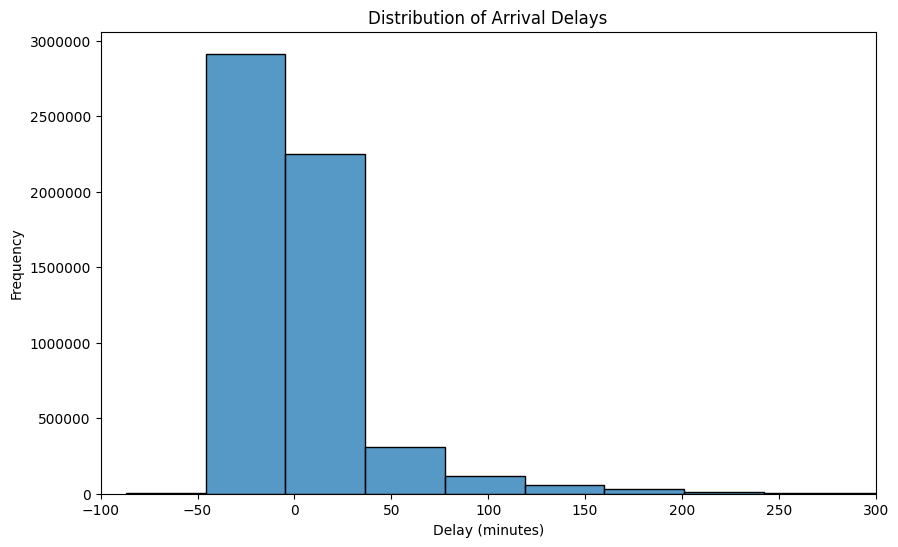

In [77]:
# Distribution of arrival delays
plt.figure(figsize=(10,6))
sns.histplot(df['ARRIVAL_DELAY'], bins=50)
plt.title("Distribution of Arrival Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain', axis='y')

# Limit x-axis to focus on delays from -100 to 300 minutes
plt.xlim(-100,300)
plt.show()

### Insights from the Graph

1. **Concentration of Delays Around Zero**:
   - Most flights have arrival delays close to 0 minutes, indicating they are on time or only slightly delayed.

2. **Negative Delays**:
   - A significant portion of flights have negative delay values, meaning they arrived earlier than the scheduled time.

3. **Few Extreme Delays**:
   - While most delays are below 150 minutes, there are a small number of extreme cases with longer delays, though these are rare.

4. **Overall Pattern**:
   - The data is heavily skewed to the left (toward 0 and negative delays), showing that long delays are not the norm.

This suggests that while flight delays are common, severe delays (above 150 minutes) are relatively infrequent. The focus for improvement could be reducing moderate delays (50-150 minutes) rather than extreme ones, as the latter are rare.

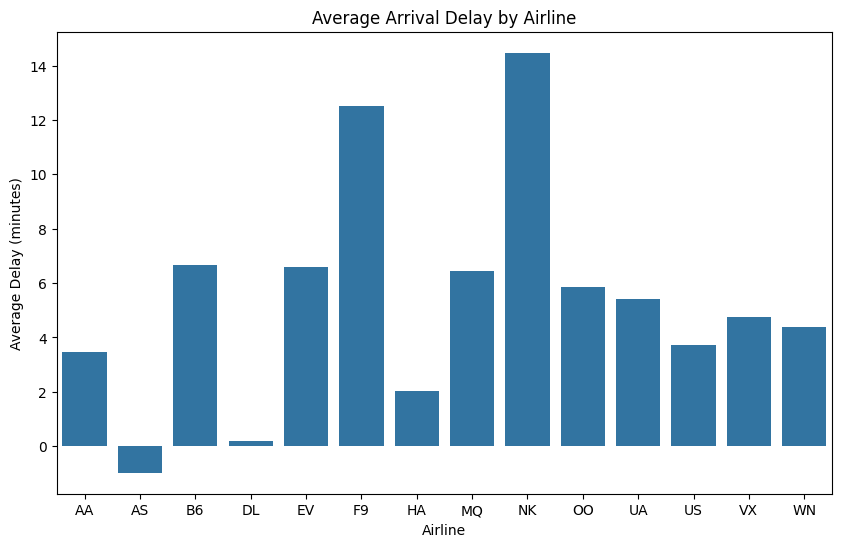

In [78]:
# Calculate the average arrival delay for each airline
mean_delay_by_airline = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=mean_delay_by_airline.index, y=mean_delay_by_airline.values)
plt.title("Average Arrival Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.show()


### Analysis of Average Arrival Delays by Airline

1. **High Delays for Specific Airlines**:
   - The airlines **NK (Spirit Airlines)** and **F9 (Frontier Airlines)** have the highest average arrival delays, both exceeding 12 minutes. This could indicate potential operational inefficiencies or external factors affecting these carriers more significantly.

2. **Moderate Delays for Most Airlines**:
   - Airlines like **B6 (JetBlue)**, **EV (ExpressJet)**, and **MQ (Envoy Air)** show moderate delays averaging between 6-8 minutes.

3. **Low Delays for Leading Airlines**:
   - **DL (Delta Airlines)** and **AS (Alaska Airlines)** have the lowest average delays, with Delta approaching nearly 0 and Alaska having slightly negative average delays, meaning they tend to arrive ahead of schedule.

4. **Overall Trend**:
   - Legacy carriers like **DL**, **AS**, and **HA (Hawaiian Airlines)** seem to perform better in terms of punctuality compared to low-cost carriers like **NK** and **F9**.

This analysis highlights significant variation in average delays across airlines. It suggests that certain low-cost carriers might need to improve their operational strategies, while legacy carriers like Delta and Alaska appear to lead in on-time performance.

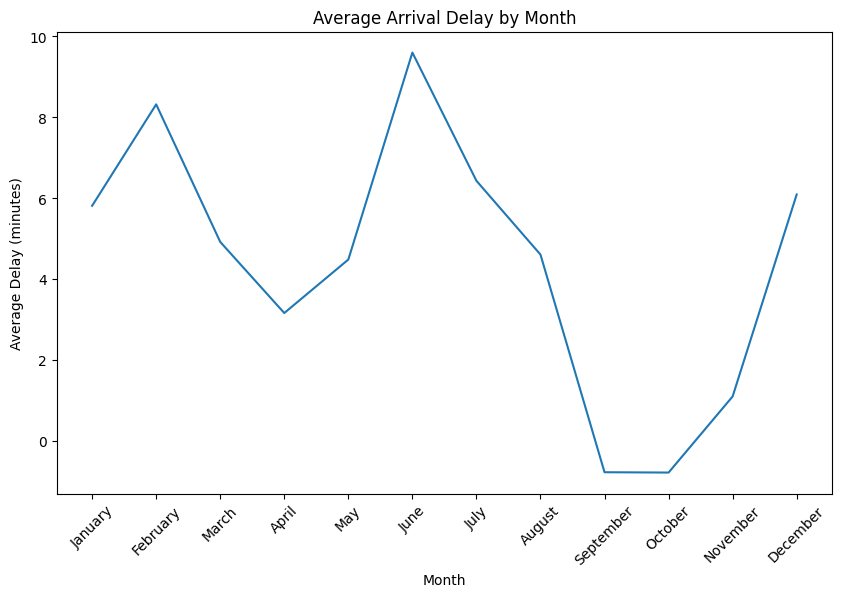

In [79]:
# Group by month and calculate the mean arrival delay
mean_delay_by_month = df.groupby('MONTH')['ARRIVAL_DELAY'].mean()

# Define a dictionary to map month numbers to names
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Map the month numbers to month names
mean_delay_by_month.index = [month_mapping[month] for month in mean_delay_by_month.index]

plt.figure(figsize=(10,6))
sns.lineplot(x=mean_delay_by_month.index, y=mean_delay_by_month.values)
plt.title("Average Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

### Analysis of Average Arrival Delay by Month

1. **High Delays in Winter and Summer**:
   - The average arrival delays peak in **July** and **January**, both exceeding 8 minutes. This could be due to high travel volumes during summer vacations and winter holidays, as well as potential weather-related disruptions in January.

2. **Low Delays in Late Summer and Fall**:
   - Delays are at their lowest in **September** and **October**, dropping close to zero. This might reflect lower travel demand and better operational efficiency during these months.

3. **Seasonal Trends**:
   - Delays show a clear seasonal pattern:
     - Winter months (January, February, and December) have relatively higher delays, likely due to weather issues like snowstorms.
     - Summer months (July) also show higher delays, potentially because of increased air traffic during peak vacation season.

4. **Overall Trend**:
   - The fluctuations in delay averages suggest that external factors like weather, holiday traffic, and operational demand vary significantly by season.

Airlines and airports could focus on improving scheduling and operational efficiency during high-delay months like **January** and **July** to reduce the overall impact on passengers. Additionally, seasonal patterns highlight the need for tailored solutions during peak travel periods.

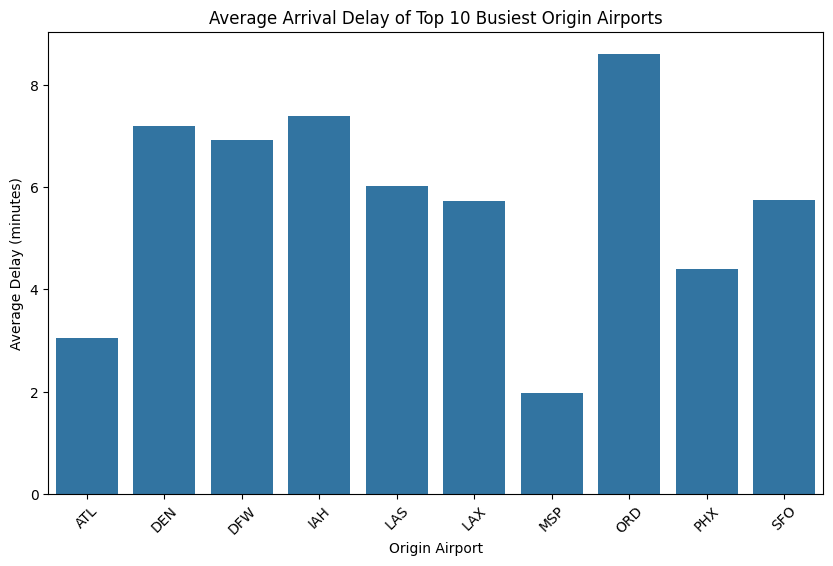

In [80]:
# Using top 10 busiest airports by count of flights simce dataset is too large
top_airports = df['ORIGIN_AIRPORT'].value_counts().head(10).index
mean_delay_by_airport = df[df['ORIGIN_AIRPORT'].isin(top_airports)].groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=mean_delay_by_airport.index, y=mean_delay_by_airport.values)
plt.title("Average Arrival Delay of Top 10 Busiest Origin Airports")
plt.xlabel("Origin Airport")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.show()


### Analysis of Average Arrival Delay of Top 10 Busiest Origin Airports

1. **High Delays at Busy Airports**:
   - **ORD (Chicago O'Hare)** has the highest average arrival delay among the top 10 busiest airports, exceeding 8 minutes. This could be due to high traffic volumes or weather-related issues, especially during winter months.

2. **Moderate Delays at Other Airports**:
   - Airports like **IAH (Houston)**, **DEN (Denver)**, **DFW (Dallas/Fort Worth)**, and **LAS (Las Vegas)** show moderate delays, ranging between 6 and 8 minutes. These delays could reflect congestion or regional factors such as operational constraints.

3. **Lower Delays at ATL and MSP**:
   - **ATL (Atlanta)** and **MSP (Minneapolis)** have the lowest average delays, with **MSP** showing delays below 5 minutes on average. These airports may benefit from more efficient operations or fewer disruptions compared to other major hubs.

4. **Overall Trend**:
   - Major hub airports with high flight volumes tend to experience greater delays, but the extent varies by airport. Factors like weather, infrastructure, and operational efficiency likely contribute to these differences.

This analysis highlights that while busy airports like **ORD** and **IAH** face significant delays, others like **MSP** and **ATL** perform better in terms of on-time arrivals. Airports with higher delays may need to address congestion and optimize resource allocation to improve performance.


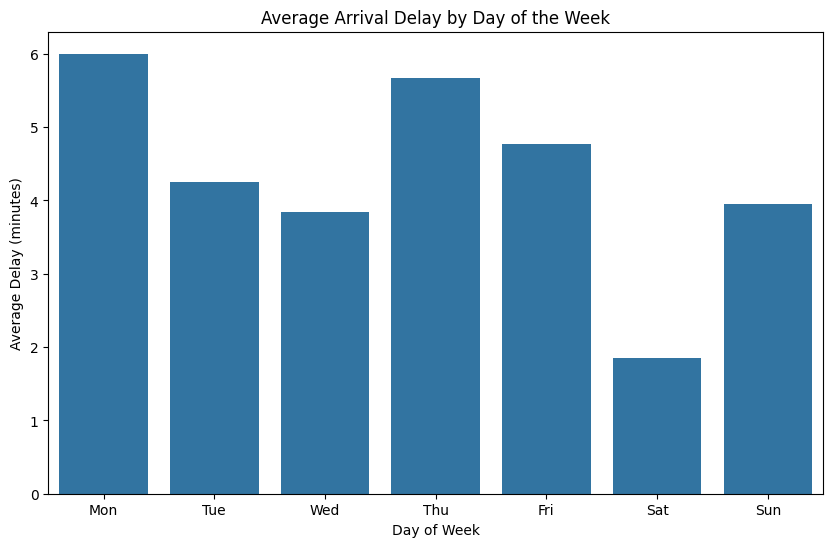

In [81]:
# Group by day of the week and calculate the mean arrival delay
mean_delay_by_day = df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean()

# Define a dictionary to map day numbers to day names
day_mapping = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

# Map the day numbers in the index to day names
mean_delay_by_day.index = [day_mapping[day] for day in mean_delay_by_day.index]

plt.figure(figsize=(10,6))
sns.barplot(x=mean_delay_by_day.index, y=mean_delay_by_day.values)
plt.title("Average Arrival Delay by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Delay (minutes)")
plt.show()


### Analysis of Average Arrival Delay by Day of the Week

1. **Highest Delays on Mondays and Thursdays**:
   - **Monday** has the highest average delay - 6 minutes. This could be attributed to the start of the business week, where flight volumes tend to be higher.
   - **Thursday** also shows significant delays, potentially due to increased mid-week travel for both business and leisure.

2. **Low Delays on Saturdays**:
   - **Saturday** has the lowest average delay, about 2 minutes. This might reflect lighter travel demand on weekends compared to weekdays.

3. **Moderate Delays on Other Days**:
   - Delays on **Tuesday, Wednesday, Friday, and Sunday** fall between 4 and 5 minutes. These days may represent a mix of business and leisure travel, but without the extremes seen on Monday and Saturday.

4. **General Observations**:
   - Weekdays, especially at the start of the week (Monday), tend to have higher delays, likely due to business travel and operational congestion.
   - Weekends show a mixed trend, with **Saturday** performing better but **Sunday** delays slightly increasing as travelers return home.

Airlines and airports may need to allocate more resources on **Mondays** and **Thursdays** to manage congestion and improve punctuality. Meanwhile, the lighter travel on **Saturdays** could be leveraged to optimize operations and reduce costs.

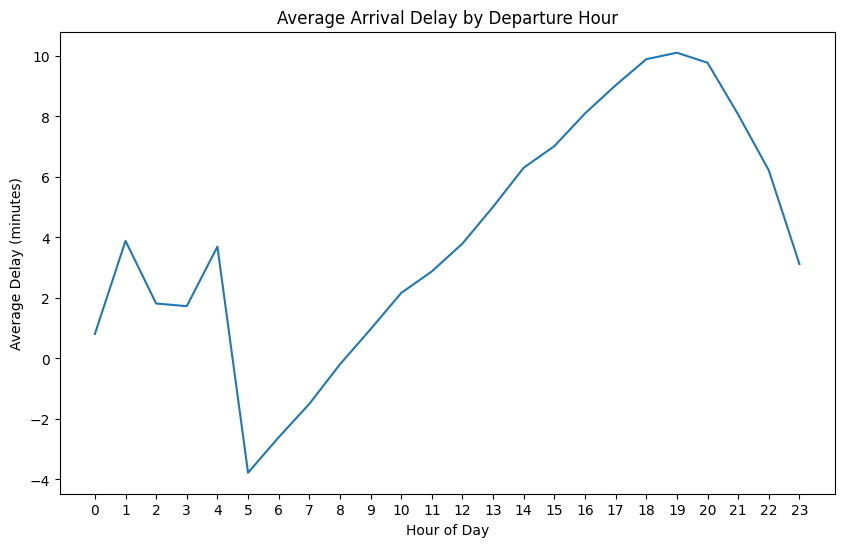

In [82]:
# Extract hour from scheduled departure time
df['DEP_HOUR'] = df['SCHEDULED_DEPARTURE'] // 100

# Calculate the mean arrival delay by departure hour
mean_delay_by_hour = df.groupby('DEP_HOUR')['ARRIVAL_DELAY'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=mean_delay_by_hour.index, y=mean_delay_by_hour.values)
plt.title("Average Arrival Delay by Departure Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(0, 24))
plt.show()


### Analysis of Average Arrival Delay by Departure Hour

1. **Low Delays in Early Morning**:
   - Flights departing between **4 AM and 6 AM** tend to have the lowest average delays, with values close to or below zero. This indicates these flights are often on time or even arrive early, likely due to less air traffic during these hours.

2. **Increasing Delays in Afternoon**:
   - Delays begin to rise significantly after **10 AM**, reaching their peak between **5 PM and 6 PM**. This pattern may result from cumulative delays throughout the day, as airports get busier and operational issues propagate.

3. **Decline in Delays After Evening Peak**:
   - After the evening peak, delays begin to decrease, particularly after **8 PM**, as air traffic diminishes and fewer flights operate later at night.

4. **General Observations**:
   - Early morning flights experience minimal delays due to lighter traffic and fewer operational disruptions.
   - The afternoon and early evening hours show the most significant delays, which may reflect compounding effects of earlier delays, higher air traffic, or logistical constraints.

Passengers aiming to minimize delays should consider booking early morning flights. Airlines and airports should focus on mitigating cascading delays during peak periods, especially between **2 PM and 7 PM**, to enhance operational efficiency.


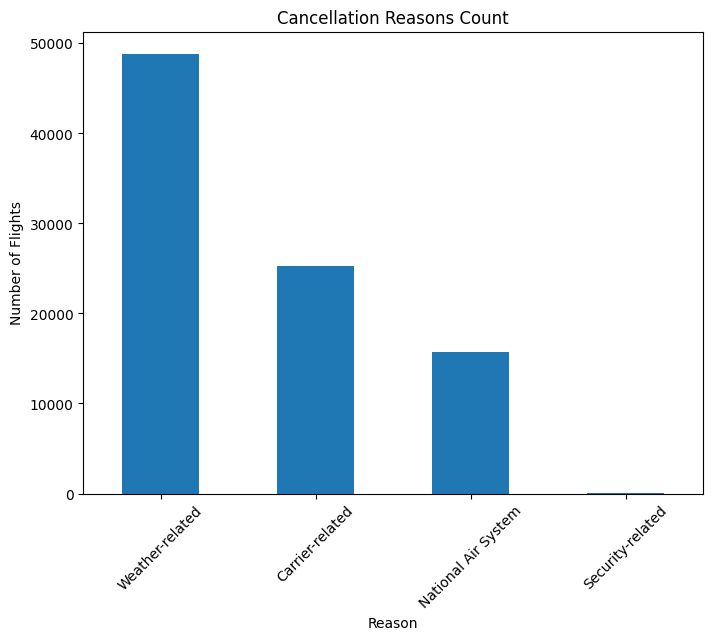

In [83]:
# Map cancellation reason codes to their descriptions
reason_mapping = {'A': 'Carrier-related', 'B': 'Weather-related', 'C': 'National Air System', 'D': 'Security-related'}

# Replace the codes in the dataset with the actual reasons
df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].replace(reason_mapping)

# Count the number of cancellations for each reason
if 'CANCELLATION_REASON' in df.columns:
    cancel_counts = df['CANCELLATION_REASON'].value_counts(dropna=True)
    cancel_counts.plot(kind='bar', figsize=(8,6))
    plt.title("Cancellation Reasons Count")
    plt.xlabel("Reason")
    plt.ylabel("Number of Flights")
    plt.xticks(rotation=45)
    plt.show()


### Analysis of Cancellation Reasons

1. **Weather (Code B) is the Leading Cause**:
   - Weather-related cancellations (**Code B**) are the most frequent, accounting for nearly 50,000 flights. This highlights the significant impact of adverse weather conditions on flight operations.

2. **Carrier-Related Cancellations (Code A)**:
   - Airline operational issues (**Code A**) are the second most common reason for cancellations, contributing to over 20,000 flights. These could include mechanical problems, crew shortages, or scheduling conflicts.

3. **National Air System (Code C)**:
   - Cancellations due to the National Air System (**Code C**) are the third most frequent, with fewer than 20,000 flights affected. These include issues like air traffic control delays or system-wide capacity constraints.

4. **Security-Related Cancellations (Code D)**:
   - Security-related cancellations (**Code D**) are negligible or non-existent in this dataset, reflecting the rarity of such events compared to other reasons.

Weather remains the predominant reason for flight cancellations, suggesting that airlines and airports need robust contingency plans for managing weather disruptions. Carrier-related issues also play a significant role, highlighting the importance of operational efficiency and resource management. National Air System constraints, while less frequent, still contribute to cancellations and may require better coordination among industry stakeholders.

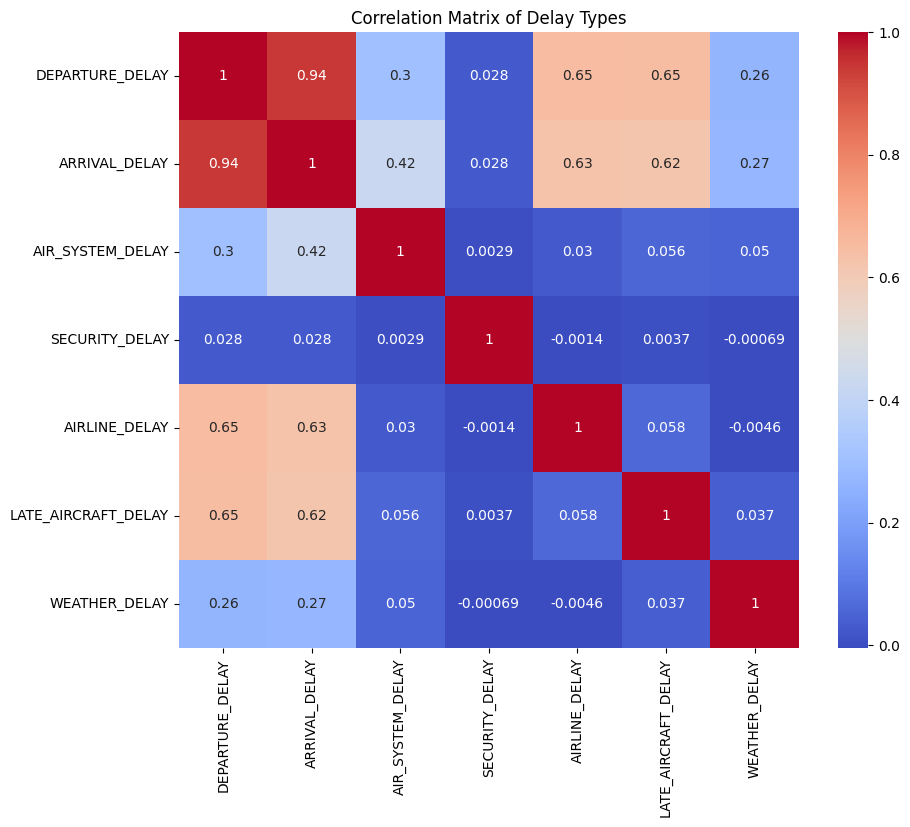

In [84]:
# Compute the correlation matrix for the selected delay-related columns
delay_cols = ['DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
corr_matrix = df[delay_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Delay Types")
plt.show()


### Analysis of Correlation Matrix of Delay Types

1. **Strong Correlation Between Departure and Arrival Delays**:
   - The highest correlation (0.94) is observed between **Departure Delay** and **Arrival Delay**. This indicates that flights delayed at departure are highly likely to arrive late as well. Addressing departure delays could significantly reduce arrival delays.

2. **Moderate Correlation with Airline and Late Aircraft Delays**:
   - **Airline Delay** and **Late Aircraft Delay** both show moderate correlations (around 0.65) with **Departure Delay** and **Arrival Delay**. This suggests that delays caused by airlines or late incoming flights contribute significantly to overall delays.

3. **Weak Correlation with Weather Delays**:
   - **Weather Delay** shows low correlations with **Departure Delay** (0.26) and **Arrival Delay** (0.27). While weather-related issues are a major cause of cancellations, their effect on delays is less directly correlated compared to other factors.

4. **Negligible Correlation with Security Delays**:
   - **Security Delay** has almost no correlation with other delay types. Security issues appear to have minimal impact on overall flight delays in this dataset.

5. **Air System Delays**:
   - **Air System Delay** shows a weak to moderate correlation (0.30 and 0.42) with **Departure Delay** and **Arrival Delay**, respectively. This suggests that air traffic management plays a smaller but notable role in delays.

This analysis highlights that departure delays, airline-related delays, and late aircraft delays are the most critical contributors to arrival delays. Addressing these areas could lead to a substantial reduction in overall delays. Weather delays and security delays, while important in specific cases, have less systemic impact on delay correlations.


# 4. Challenges and Limitations
---
- Discuss any challenges encountered during the project, such as:
 - Issues with data quality.
 - Constraints in analysis tools or time.
- Highlight any limitations in your analysis and how they might affect your conclusions.

# ANSWER 4 -

- **Data Quality**: Missing values and NaNs in delay fields were handled by filling with zeros or excluding them when appropriate. This approach might oversimplify the data and fail to capture nuanced delay causes.  
- **Single Year Data**: The analysis is based solely on 2015 data, limiting its relevance to current trends or changes in aviation operations over time.  
- **External Factors**: While delay reasons (e.g., weather, airline issues) were considered, external factors such as detailed weather conditions, air traffic control (ATC) policies, and airport staffing are not fully integrated into the dataset.  
- **Time and Day Patterns**: Although we observed patterns by time of day and day of the week, the reasons behind these patterns remain unexplored, such as whether they are operational, infrastructural, or passenger volume-related.  
- **Sampling Bias**: The dataset covers US domestic flights, meaning insights might not generalize to international flights or other regions with different aviation dynamics.

# 5. Conclusion and Future Direction
---
- Conclusions: Summarize your main findings in relation to your project objectives.
- Recommendation and Future Direction:
 - Propose actions based on your findings.
 - Suggest next steps for further analysis or research.

# ANSWER 5 -

#### **Conclusions**:
- Certain airlines and airports are more prone to delays, reflecting potential operational or infrastructural inefficiencies.  
- Seasonal trends were evident, with winter months generally showing increased delays, possibly due to weather-related challenges.  
- Time and day of week patterns highlighted that delays are often worse during later hours of the day and on certain high-traffic days (e.g., Fridays and Sundays).  
- Cancellations are largely driven by carrier-related or weather-related issues, with weather being a particularly significant factor in winter months.  
- Correlation analysis confirmed that departure delays strongly influence arrival delays, emphasizing the cascading effect of initial schedule disruptions.

#### **Recommendations**:
- Airlines can focus on improving operational processes to minimize cascading delays, particularly by addressing bottlenecks during peak travel hours and days.  
- Airports might explore strategies to optimize capacity during high-demand days and hours, possibly through improved scheduling or additional infrastructure investments.  
- Airports and airlines should prepare for seasonal challenges, particularly in winter months, by refining contingency plans for weather-related disruptions.  

#### **Future Work**:
- **Incorporating External Data**: Include detailed weather data, passenger volume, and airport staffing information to better understand the underlying reasons for observed patterns.  
- **Extending the Time Frame**: Analyze data from multiple years to identify long-term trends and validate seasonal or temporal patterns.  
- **Deeper Cause Analysis**: Explore operational and passenger behavior data to explain observed patterns by time of day and day of week.  
- **Predictive Analytics**: Build predictive models to forecast delays based on historical data, external factors, and operational variables, helping airlines and airports proactively mitigate potential disruptions.  
- **International Comparisons**: Expand the dataset to include international flights to compare delay patterns across regions and identify global best practices.  

# 6. References
---
- List all references for datasets, tools, and external sources used in the project.

* Kaggle. Kaggle Datasets. https://www.kaggle.com
* Daniel, F. Predicting Flight Delays Tutorial. https://www.kaggle.com/code/fabiendaniel/predicting-flight-delays-tutorial
* Nekouei, F. Flight Data EDA to Preprocessing. https://www.kaggle.com/code/farzadnekouei/flight-data-eda-to-preprocessing